In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1fFRBGLqL6ZN3wSIIyFRCUaegY0abAlqm/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.columns=['ID','Email','Net_Revenue','Year']

In [4]:
df.duplicated().value_counts() #Checking for duplicates if any

False    685927
dtype: int64

In [5]:
df=df.drop('ID',axis=1) #Since ID is of no use as we already have index 

In [6]:
df.isnull().sum() #Checking for any null values

Email          0
Net_Revenue    0
Year           0
dtype: int64

 Since Data is Cleaned and there are no null values, we can move forward.

# For each year we need the following information:

•	Total revenue for the current year

•	New Customer Revenue e.g. new customers not present in previous year only

•	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

•	Revenue lost from attrition

•	Existing Customer Revenue Current Year

•	Existing Customer Revenue Prior Year

•	Total Customers Current Year

•	Total Customers Previous Year

•	New Customers

•	Lost Customers


In [7]:
df.Year.unique()

array([2015, 2016, 2017])

In [8]:
Years=df.groupby(df.Year) #Grouping Each data by different years i.e. 2015, 2016, 2017

In [9]:
Data_of_2015=Years.get_group(2015) #Creating each group for each year

In [10]:
Data_of_2016=Years.get_group(2016)

In [11]:
Data_of_2017=Years.get_group(2017)

# Total Revenue of Current Year

In [12]:
Revenue_of_2015=Data_of_2015['Net_Revenue'].sum()
print(f"Total Revenue of 2015 is {Revenue_of_2015.round(2)}")

Total Revenue of 2015 is 29036749.19


In [13]:
Revenue_of_2016=Data_of_2016['Net_Revenue'].sum()
print(f"Total Revenue of 2016 is {Revenue_of_2016.round(2)}")

Total Revenue of 2016 is 25730943.59


In [14]:
Revenue_of_2017=Data_of_2017['Net_Revenue'].sum()
print(f"Total Revenue of 2017 is {Revenue_of_2017.round(2)}")

Total Revenue of 2017 is 31417495.03


In [15]:
Revenue=[
    (2015,Revenue_of_2015),
    (2016,Revenue_of_2016),
    (2017,Revenue_of_2017)
]
Total_Revenue=pd.DataFrame(Revenue,columns=['Year','TotalRevenue'])
Total_Revenue

,Year,TotalRevenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


Text(0, 0.5, 'Total Revenue(in crores)')

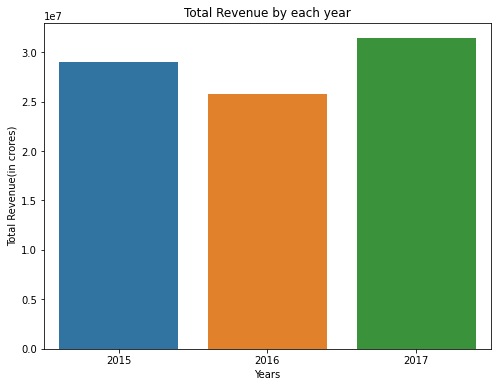

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(data=Total_Revenue,x='Year',y='TotalRevenue')
plt.title("Total Revenue by each year")
plt.xlabel("Years")
plt.ylabel("Total Revenue(in crores)")

In [17]:
Total_Revenue

,Year,TotalRevenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


# New Customer Revenue e.g. new customers not present in previous year only

Logic:- Now, we need to calculate New customers Revenue for each year. 

Since, 2015 is the initial year and all the email_ID's are unique, it would be same as Total revenue of 2015.

For 2016, we need to consider only those records which are new in terms of email ID(i.e. New Customers). So, isin operator is used to check the email ID's of 2016 with 2015 and find out new customers of 2016 and it's total revenue.

For 2017, we need to consider only those records which are new in terms of email ID(i.e. New Customers). So, isin operator is used to check the email ID's of 2017 with 2016 and 2015 and find out new customers of 2017 and then sum up the revenue to find out Total revenue of new customers.


In [18]:
Revenue_of_2015=Data_of_2015['Net_Revenue'].sum()
print(f"Total Revenue of New Customers of 2015 is {Revenue_of_2015.round(2)}")

Total Revenue of New Customers of 2015 is 29036749.19


In [19]:
New_Customers_of_2016 = Data_of_2016[Data_of_2016.Email.isin(Data_of_2015.Email) == False] #Using Minus Intersection to get unique Email IDs for year 2016
New_Customers_of_2016

,Email,Net_Revenue,Year
231294,mwrossuukz@gmail.com,197.26,2016
231295,gkwsoupawk@gmail.com,38.28,2016
231296,vlyigtgfzs@gmail.com,154.57,2016
231297,yfirychuhk@gmail.com,102.47,2016
231298,trnzgqinuu@gmail.com,32.03,2016
...,...,...,...
435933,sqodpufunf@gmail.com,29.62,2016
435934,dcakqgznnm@gmail.com,146.47,2016
435936,rdotspqdxi@gmail.com,169.79,2016
435937,fkweqlmmjw@gmail.com,79.71,2016


In [20]:
d=Data_of_2015.append(Data_of_2016)
d['Email'].nunique()-Data_of_2015['Email'].nunique() #Crosschecking the new customers by merging data of both the years and checking it with the nunique values


145062

In [21]:
New_Customer_Revenue_of_2016=New_Customers_of_2016['Net_Revenue'].sum()
print(f"Total Revenue of New Customers of 2016 is {New_Customer_Revenue_of_2016.round(2)}")

Total Revenue of New Customers of 2016 is 18245491.01


In [22]:
New_Customers_of_2017 = Data_of_2017[Data_of_2017.Email.isin(Data_of_2015.Email) == False] #Using Minus Intersection to get unique Email IDs for year 2015
New_Customers_of_2017 = Data_of_2017[Data_of_2017.Email.isin(Data_of_2016.Email) == False] #Using Minus Intersection to get unique Email IDs for year 2016
New_Customer_Revenue_of_2017=New_Customers_of_2017.Net_Revenue.sum()
print(f"Total Revenue of New Customers of 2017 is {New_Customer_Revenue_of_2017.round(2)}")

Total Revenue of New Customers of 2017 is 28776235.04


In [23]:
New_Customer_Revenue_of_2015=Data_of_2015['Net_Revenue'].sum()
print(f"Total Revenue of New Customers 2015 is {New_Customer_Revenue_of_2015.round(2)}")

New_Customer_Revenue_of_2016=New_Customers_of_2016['Net_Revenue'].sum()
print(f"Total Revenue of New Customers of 2016 is {New_Customer_Revenue_of_2016.round(2)}")

New_Customer_Revenue_of_2017=New_Customers_of_2017['Net_Revenue'].sum()
print(f"Total Revenue of New Customers of 2017 is {New_Customer_Revenue_of_2017.round(2)}")

Total Revenue of New Customers 2015 is 29036749.19
Total Revenue of New Customers of 2016 is 18245491.01
Total Revenue of New Customers of 2017 is 28776235.04


In [53]:
New_Customer_Revenue=[
    (2015,New_Customer_Revenue_of_2015),
    (2016,New_Customer_Revenue_of_2016),
    (2017,New_Customer_Revenue_of_2017)
]
New_Customer_Total_Revenue=pd.DataFrame(New_Customer_Revenue,columns=['Year','Total_Revenue_of_new_customers']) #Here, we are considering 2015 as the starting year where all the customers are considered as new customers
New_Customer_Total_Revenue

,Year,Total_Revenue_of_new_customers
0,2015,29036749.19
1,2016,18245491.01
2,2017,28776235.04


Text(0, 0.5, 'Total Revenue')

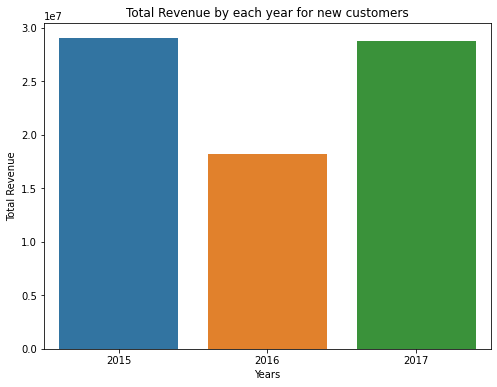

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data=New_Customer_Total_Revenue,x='Year',y='TotalRevenue_of_new_customers')
plt.title("Total Revenue by each year for new customers")
plt.xlabel("Years")
plt.ylabel("Total Revenue")

#	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [26]:
Existing_Customers_of_2016 = Data_of_2016[Data_of_2016.Email.isin(Data_of_2015.Email) == True]
Existing_Customers_of_2016_previous_year = Data_of_2015[Data_of_2015.Email.isin(Data_of_2016.Email) == True] 

In [27]:
Existing_Customers_of_2017 = Data_of_2017[Data_of_2017.Email.isin(Data_of_2016.Email) == True] #Using Minus Intersection to get existing Email IDs for year 2016
Existing_Customers_of_2017_previous_year = Data_of_2016[Data_of_2016.Email.isin(Data_of_2017.Email) == True] 

In [28]:
Existing_Customers_of_2017.Net_Revenue.sum()

2641259.99

In [29]:
Existing_Customers_of_2016.Net_Revenue.sum()

7485452.58

In [30]:
Customer_Growth_from_2015_to_2016=Existing_Customers_of_2016.Net_Revenue.sum()-Existing_Customers_of_2016_previous_year.Net_Revenue.sum()

In [31]:
Customer_Growth_from_2015_to_2016

20335.459999999963

In [32]:
Customer_Growth_from_2016_to_2017=Existing_Customers_of_2017.Net_Revenue.sum()-Existing_Customers_of_2017_previous_year.Net_Revenue.sum()

In [33]:
Customer_Growth_from_2016_to_2017

20611.340000000317

# Revenue lost from attrition

In [54]:
Lost_Customers_of_2016 = Data_of_2015[Data_of_2015.Email.isin(Data_of_2016.Email) == False] 

In [56]:
Lost_Customers_of_2017 = Data_of_2016[Data_of_2016.Email.isin(Data_of_2017.Email) == False] 

In [58]:
Revenue_Lost= Lost_Customers_of_2016.Net_Revenue.sum() + Lost_Customers_of_2017.Net_Revenue.sum()

In [59]:
print(f' Total Revenue Lost from attrition is {Revenue_Lost.round(2)}')

 Total Revenue Lost from attrition is 44681927.01


#	Existing Customer Revenue Current Year and Prior Year

In [40]:
print(f' Total Revenue of Existing Customers in 2015 is 0')#As er don't have data of previous year's and this year's to get the existing customers

 Total Revenue of Existing Customers in 2015 is 0


In [62]:
Existing_Customers_of_2016_Revenue=Existing_Customers_of_2016.Net_Revenue.sum()
print(f' Total Revenue of Existing Customers in 2016 is {Existing_Customers_of_2016_Revenue.round(2)}')

 Total Revenue of Existing Customers in 2016 is 7485452.58


In [61]:
Existing_Customers_of_2017_Revenue=Existing_Customers_of_2017.Net_Revenue.sum()
print(f' Total Revenue of Existing Customers in 2017 is {Existing_Customers_of_2017_Revenue.round(2)}')

 Total Revenue of Existing Customers in 2017 is 2641259.99


# Total Customers Current Year and Total Customers Previous Year


In [43]:
Total_Customers_in_2015=Data_of_2015.Email.nunique()
print(f' Total Unique Customers in 2015 were {Total_Customers_in_2015}')

 Total Unique Customers in 2015 were 231294


In [64]:
Total_Customers_in_2016=pd.concat([Data_of_2015,Data_of_2016])
Total_Customers_in_2016=Total_Customers_in_2016.Email.nunique()
print(f' Total Unique Customers in 2015 and 2016 were {Total_Customers_in_2016}')
print(f' Total Customers in 2016 were {Data_of_2016.Email.nunique()}')

 Total Unique Customers in 2015 and 2016 were 376356
 Total Customers in 2016 were 204646


In [65]:
Total_Customers_in_2017=df.Email.nunique()
print(f' Total Unique Customers in 2015, 2016 and 2017 were {Total_Customers_in_2017}')
print(f' Total Customers in 2017 were {Data_of_2017.Email.nunique()}')

 Total Unique Customers in 2015, 2016 and 2017 were 604618
 Total Customers in 2017 were 249987


# New Customers and Lost Cutomers

In [46]:
print(f' New Customers in 2015 were {Data_of_2015.Email.nunique()}')
print(f' New Customers in 2016 were {New_Customers_of_2016.Email.nunique()}')
print(f' New Customers in 2017 were {New_Customers_of_2017.Email.nunique()}')

 New Customers in 2015 were 231294
 New Customers in 2016 were 145062
 New Customers in 2017 were 229028


In [52]:
New_Customer_Revenue_of_2017

28776235.039999995

In [77]:
Lost_Customers_of_2016

,Email,Net_Revenue,Year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
231289,xtrpmgjbwp@gmail.com,216.89,2015
231290,peeorxpsbr@gmail.com,39.16,2015
231291,vanasezjpw@gmail.com,233.46,2015
231292,dnpremlztb@gmail.com,136.27,2015


In [80]:
print(f' Lost Customers in 2016 were {Lost_Customers_of_2016.Email.nunique()}')
print(f' Lost Customers in 2017 were {Lost_Customers_of_2017.Email.nunique()}')


 Lost Customers in 2016 were 171710
 Lost Customers in 2017 were 183687


In [93]:
Final=[
    (2015,Revenue_of_2015,Total_Customers_in_2015,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan),
    (2016,Revenue_of_2016,Data_of_2016.Email.nunique(),New_Customers_of_2016.Email.nunique(),New_Customer_Revenue_of_2016,Existing_Customers_of_2016.Email.nunique(),Existing_Customers_of_2016_Revenue,Lost_Customers_of_2016.Email.nunique(),Lost_Customers_of_2016.Net_Revenue.sum()),
    (2017,Revenue_of_2017,Data_of_2017.Email.nunique(),New_Customers_of_2017.Email.nunique(),New_Customer_Revenue_of_2017,Existing_Customers_of_2017.Email.nunique(),Existing_Customers_of_2017_Revenue,Lost_Customers_of_2017.Email.nunique(),Lost_Customers_of_2017.Net_Revenue.sum())
]
Final=pd.DataFrame(Final,columns=['Year','Total Revenue','Total Customers','New Customers','New Customers Revenue','Existing Customers','Existing Customers Revenue','Lost Customers','Lost Customers Revenue'])
Final

,Year,Total Revenue,Total Customers,New Customers,New Customers Revenue,Existing Customers,Existing Customers Revenue,Lost Customers,Lost Customers Revenue
0,2015,29036749.19,231294,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,25730943.59,204646,145062.0,18245491.01,59584.0,7485452.58,171710.0,21571632.07
2,2017,31417495.03,249987,229028.0,28776235.04,20959.0,2641259.99,183687.0,23110294.94
